# N-Grams Exploratory Data Analysis
Prepared by: `Pat Pascual`

## Setup libraries and data loading

Install the necessary libraries: nltk for natural language processing, wordcloud for generating word cloud images, and matplotlib for plotting.

Import the functions and libraries that will be utilized in subsequent steps.

In [1]:
!pip install nltk wordcloud matplotlib

In [2]:
## if you are using colab, mount drive to access dataset from your gdrive

# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# for data load and wrangling
import pandas as pd

# for text preprocessing
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('punkt') # Downloads the Punkt tokenizer models
nltk.download('stopwords') # Downloads the list of stopwords
nltk.download('wordnet') # Downloads the WordNet lemmatizer data
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger_eng')

# for visualizations
import matplotlib.pyplot as plt
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


In [4]:
df = pd.read_csv('/content/20-24-rappler-tech-cleaned.csv')
df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]",Sam Bankman-Fried will not face a second trial,"NEW YORK, USA - US prosecutors said they do ..."
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"New York Times sues OpenAI, Microsoft for copy...","MANILA, Philippines - The New York Times on ..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]",Elon Musk's X fails to block California's cont...,"Elon Musk's X on Thursday, December 28, fail..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"China's Xiaomi unveils first electric car, pla...","BEIJING, China - Chinese smartphone maker Xi..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]",Apple can temporarily sell smartwatches after ...,Apple can for now resume sales of its flagsh...


## Preprocess titles

**Knowing that we'll be working with n-grams, what's the oversight in the approach below?**

In [5]:
titles = df['title.cleaned'].str.cat(sep=' ')

tokens = word_tokenize(titles)
tokens = [word.lower() for word in tokens
          if word not in stopwords.words('english')
          and word not in string.punctuation]

tokens[0:10]

['sam',
 'bankman-fried',
 'face',
 'second',
 'trial',
 'new',
 'york',
 'times',
 'sues',
 'openai']

In [6]:
# Approach to preprocessing for ngrams analysis
def preprocess_text(text):
    tokens = word_tokenize(text)
    tokens = [word.lower() for word in tokens
              if word not in (stopwords.words('english') + ["'s", '‘'])
              and word not in string.punctuation]
    return tokens

df['tokens'] = df['title.cleaned'].apply(preprocess_text)
df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned,tokens
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]",Sam Bankman-Fried will not face a second trial,"NEW YORK, USA - US prosecutors said they do ...","[sam, bankman-fried, face, second, trial]"
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"New York Times sues OpenAI, Microsoft for copy...","MANILA, Philippines - The New York Times on ...","[new, york, times, sues, openai, microsoft, co..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]",Elon Musk's X fails to block California's cont...,"Elon Musk's X on Thursday, December 28, fail...","[elon, musk, x, fails, block, california, cont..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"China's Xiaomi unveils first electric car, pla...","BEIJING, China - Chinese smartphone maker Xi...","[china, xiaomi, unveils, first, electric, car,..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]",Apple can temporarily sell smartwatches after ...,Apple can for now resume sales of its flagsh...,"[apple, temporarily, sell, smartwatches, us, a..."


## N-grams Analysis

N-grams are continuous sequences of 'n' items from a text. Bigrams are 2-grams, which means they're pairs of words. By analyzing bigrams, we get a glimpse into common word pairs or phrases in the dataset.

We will use `nltk.bigrams` to generate bigrams based on tokens.

In [7]:
# Generate bigrams
df['bigrams'] = df['tokens'].apply(lambda x: list(nltk.bigrams(x)))
df.head()

,id,slug,title.rendered,content.rendered,excerpt.rendered,link,date,modified,categories,title.cleaned,content.cleaned,tokens,bigrams
0,2577999,sam-bankman-fried-not-face-second-trial,Sam Bankman-Fried will not face a second trial,"\n<p>NEW YORK, USA – US prosecutors said they ...",<p>Prosecutors say the &#8216;strong public in...,https://www.rappler.com/technology/sam-bankman...,2023-12-30 11:00:00,2023-12-30 19:57:19,"[732, 768, 761]",Sam Bankman-Fried will not face a second trial,"NEW YORK, USA - US prosecutors said they do ...","[sam, bankman-fried, face, second, trial]","[(sam, bankman-fried), (bankman-fried, face), ..."
1,2577486,new-york-times-sues-openai-microsoft-copyright...,"New York Times sues OpenAI, Microsoft for copy...","\n<p>MANILA, Philippines – The New York Times ...",<p>The New York Times&#8217; complaint says Op...,https://www.rappler.com/technology/new-york-ti...,2023-12-29 15:12:14,2023-12-29 15:12:24,[732],"New York Times sues OpenAI, Microsoft for copy...","MANILA, Philippines - The New York Times on ...","[new, york, times, sues, openai, microsoft, co...","[(new, york), (york, times), (times, sues), (s..."
2,2577484,twitter-x-fails-block-california-content-moder...,Elon Musk&#8217;s X fails to block California&...,"\n<p>Elon Musk&#8217;s X on Thursday, December...",<p>The law requires social media companies wit...,https://www.rappler.com/technology/social-medi...,2023-12-29 14:16:24,2023-12-29 14:16:28,"[740, 732]",Elon Musk's X fails to block California's cont...,"Elon Musk's X on Thursday, December 28, fail...","[elon, musk, x, fails, block, california, cont...","[(elon, musk), (musk, x), (x, fails), (fails, ..."
3,2577149,xiaomi-unveils-first-electric-car-plans-become...,China&#8217;s Xiaomi unveils first electric ca...,"\n<p>BEIJING, China – Chinese smartphone maker...","<p>The sedan, dubbed the SU7, is a highly anti...",https://www.rappler.com/technology/xiaomi-unve...,2023-12-28 16:59:26,2023-12-28 16:59:28,[732],"China's Xiaomi unveils first electric car, pla...","BEIJING, China - Chinese smartphone maker Xi...","[china, xiaomi, unveils, first, electric, car,...","[(china, xiaomi), (xiaomi, unveils), (unveils,..."
4,2576906,apple-can-temporarily-sell-smartwatches-after-...,Apple can temporarily sell smartwatches after ...,\n<p>Apple can for now resume sales of its fla...,<p>Masimo has accused Apple of hiring away its...,https://www.rappler.com/technology/gadgets/app...,2023-12-28 09:53:24,2023-12-28 09:53:35,"[738, 732]",Apple can temporarily sell smartwatches after ...,Apple can for now resume sales of its flagsh...,"[apple, temporarily, sell, smartwatches, us, a...","[(apple, temporarily), (temporarily, sell), (s..."


In [8]:
# Flatten list of bigrams
bigrams = df['bigrams'].explode().tolist()

In [9]:
# Compute frequency distribution
bigram_counts = nltk.FreqDist(bigrams)

print("\nTop 10 bigrams by frequency:")
for (word1, word2), freq in bigram_counts.most_common(10):
    print(f"{word1} {word2}: {freq}")


Top 10 bigrams by frequency:
social media: 116
elon musk: 84
big tech: 41
musk says: 36
samsung galaxy: 31
app store: 30
hate speech: 24
tech giants: 22
south korea: 21
price philippines: 20


Trigrams, on the other hand, are groups of three consecutive words or tokens used in language analysis to further understand the context and relationships between words in a text.

We will use `nltk.trigrams` to generate trigrams.

In [10]:
# Generate trigrams
df['trigrams'] = df['tokens'].apply(lambda x: list(nltk.trigrams(x)))

# Flatten list of trigrams
trigrams = df['trigrams'].explode().tolist()

In [11]:
# Compute frequency distribution
trigram_counts = nltk.FreqDist(trigrams)

print("\nTop 10 trigrams by frequency:")
for (word1, word2, word3), freq in trigram_counts.most_common(10):
    print(f"{word1} {word2} {word3}: {freq}")


Top 10 trigrams by frequency:
specs price philippines: 18
elon musk says: 15
musk says twitter: 11
facebook oversight board: 10
techrap level 1: 10
facebook owner meta: 9
us supreme court: 9
apple app store: 9
new york times: 8
the game awards: 8


Alternatively, we can use `nltk.ngrams` and set 'n' argument to generate any ngrams.

In [12]:
# Generate trigrams
df['trigrams_2'] = df['tokens'].apply(lambda x: list(nltk.ngrams(x, 3)))

# Flatten list of trigrams
trigrams = df['trigrams_2'].explode().tolist()

In [13]:
# Compute frequency distribution
trigram_counts = nltk.FreqDist(trigrams)

print("\nTop 10 trigrams by frequency:")
for (word1, word2, word3), freq in trigram_counts.most_common(10):
    print(f"{word1} {word2} {word3}: {freq}")


Top 10 trigrams by frequency:
specs price philippines: 18
elon musk says: 15
musk says twitter: 11
facebook oversight board: 10
techrap level 1: 10
facebook owner meta: 9
us supreme court: 9
apple app store: 9
new york times: 8
the game awards: 8


## Visualizing N-grams

We can also generate n-gram word clouds and frequency visualizations. With the code snippets below, we create bar charts for the top bigrams and trigrams, as well as word clouds for each.

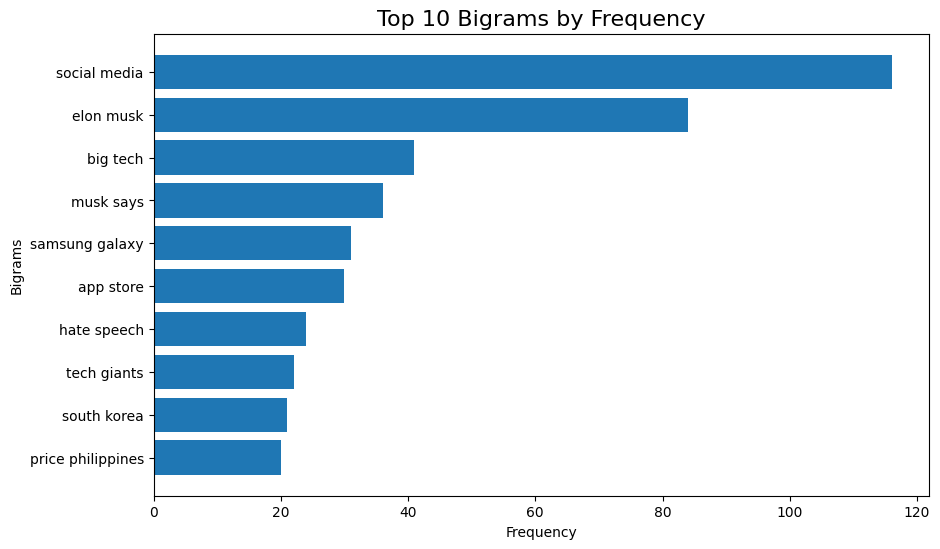

In [14]:
# Compute bigram frequencies
bigram_counts = nltk.FreqDist(bigrams)
top_10_bigrams = bigram_counts.most_common(10)

# Extract bigram words and frequencies
bigram_words = [f"{word1} {word2}" for (word1, word2), freq in top_10_bigrams]
bigram_frequencies = [freq for (word1, word2), freq in top_10_bigrams]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(bigram_words, bigram_frequencies)
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.title('Top 10 Bigrams by Frequency', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

For the word cloud, we simply use the `.generate_from_frequencies` method.

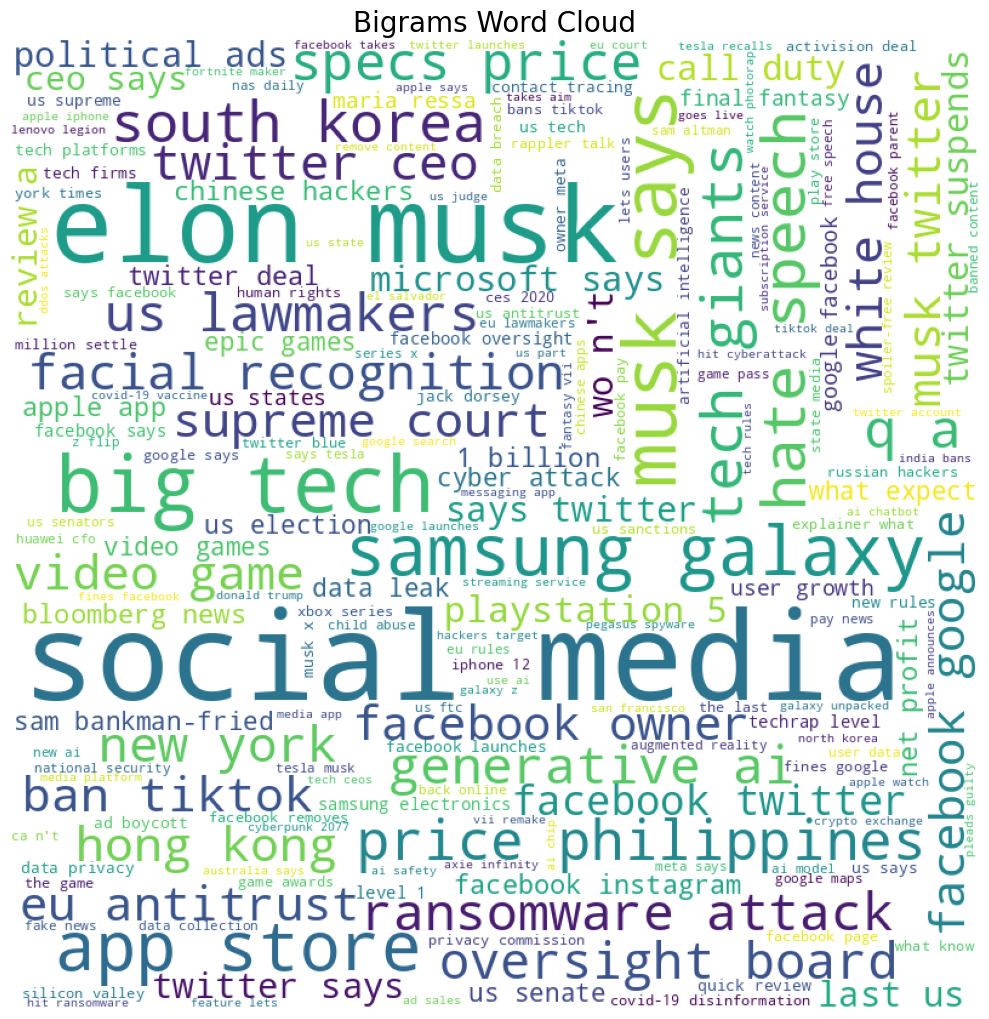

In [15]:
# Convert bigram frequency distribution into a dictionary
bigram_dict = {f'{bigram[0]} {bigram[1]}': count
               for bigram, count in bigram_counts.items()}

# Generate WordCloud
wordcloud = WordCloud(
    width=800, height=800,
    background_color='white',
    min_font_size=10
).generate_from_frequencies(bigram_dict)

# Plot WordCloud
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.title('Bigrams Word Cloud', fontsize=20)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Now, we do the same for trigrams.

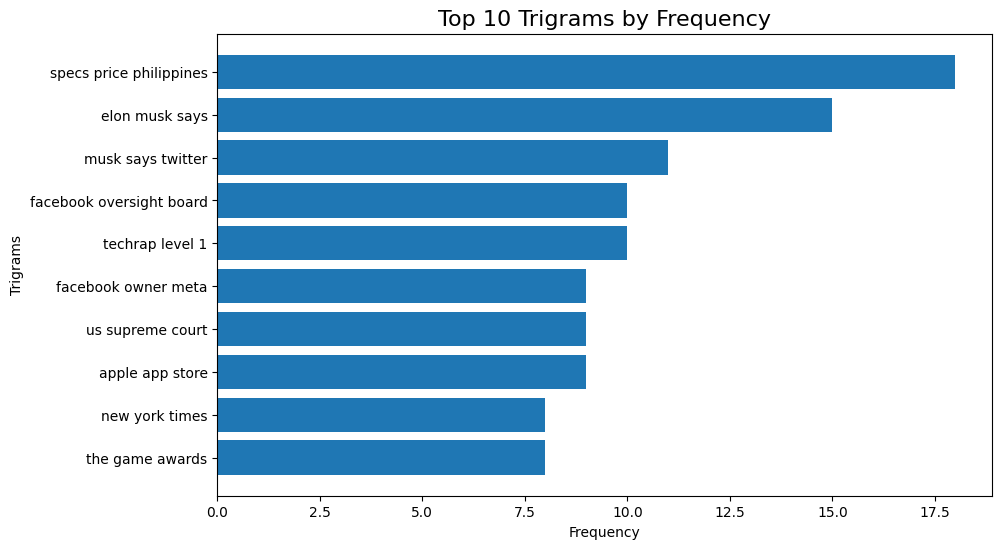

In [16]:
# Compute trigram frequencies
trigram_counts = nltk.FreqDist(trigrams)
top_10_trigrams = trigram_counts.most_common(10)

# Extract trigram words and frequencies
trigram_words = [f"{word1} {word2} {word3}"
                 for (word1, word2, word3), freq in top_10_trigrams]

trigram_frequencies = [
    freq for (word1, word2, word3), freq in top_10_trigrams
]

# Plot horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(trigram_words, trigram_frequencies)
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.title('Top 10 Trigrams by Frequency', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

Now, for the trigrams wordcloud:

In [17]:
# Convert trigram frequency distribution into a dictionary
trigram_dict = {f'{trigram[0]} {trigram[1]} {trigram[2]}': count
               for trigram, count in trigram_counts.items()}

TypeError: 'float' object is not subscriptable

In [18]:
# Check where it errors
for trigram, count in trigram_counts.items():
    if not isinstance(trigram, tuple) or len(trigram) != 3:
        print("Unexpected key in trigram_counts:", trigram)

Unexpected key in trigram_counts: nan
Unexpected key in trigram_counts: nan
Unexpected key in trigram_counts: nan
Unexpected key in trigram_counts: nan


In [19]:
# Adjusted code for trigrams freq dictionary
trigram_dict = {f'{trigram[0]} {trigram[1]} {trigram[2]}': count
                for trigram, count in trigram_counts.items()
                if isinstance(trigram, tuple)}

# trigram_dict

In [20]:
# Generate WordCloud
wordcloud = WordCloud(
    width=800, height=800,
    background_color='white',
    min_font_size=10
).generate_from_frequencies(trigram_dict)

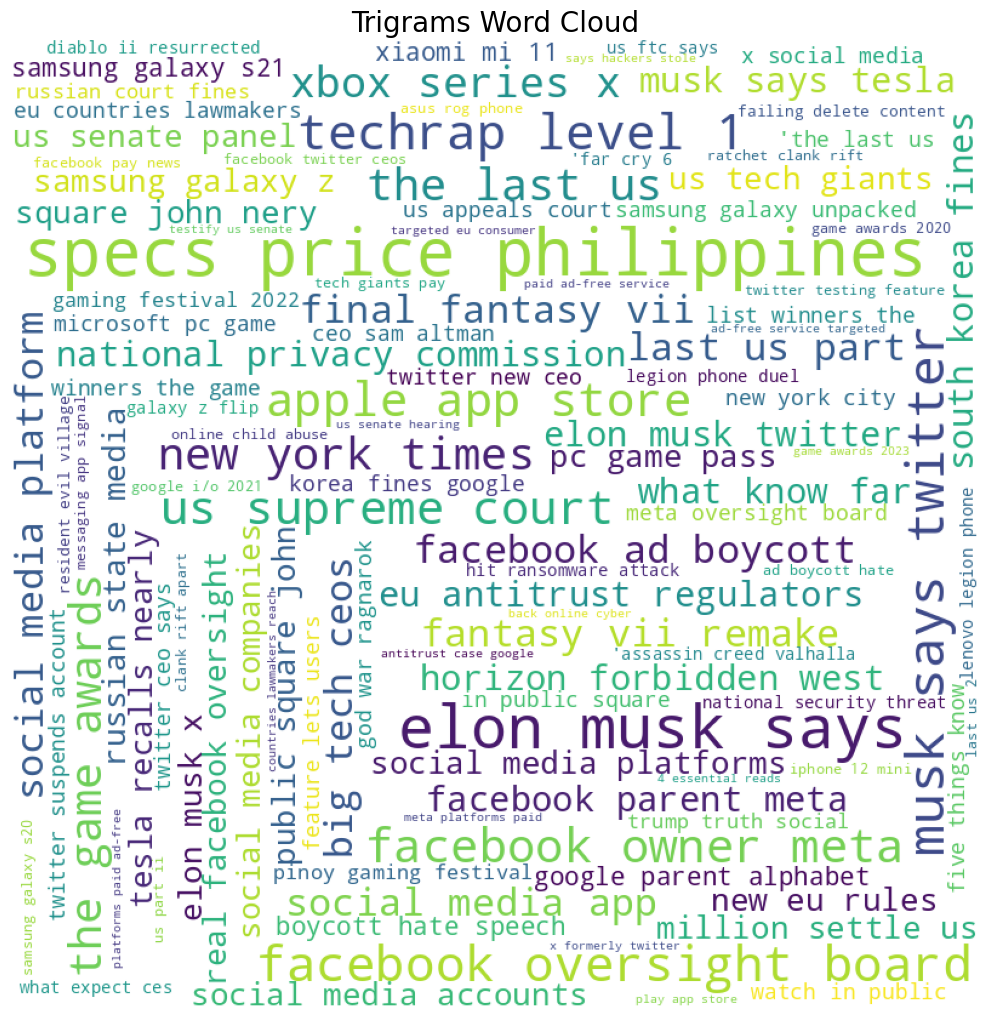

In [21]:
# Plot WordCloud
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.title('Trigrams Word Cloud', fontsize=20)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()